## Import library

In [436]:
#!pip install pycaret

In [437]:
# For managing data
import pandas as pd
import numpy as np

# For importing data from Google Drive
from google.colab import drive

# For visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA # Using only for visulisation

# For styling an visualisation
%matplotlib inline
sns.set_style()
mpl.rcParams["font.size"] = 14
from matplotlib.ticker import MultipleLocator
from yellowbrick.cluster import KElbowVisualizer

# For data preprocessing for ML model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# For training multiple ML algorithm and a comparison
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from pycaret.clustering import *
from sklearn import metrics

# Turn off warnings
import warnings
warnings.filterwarnings("ignore")

## Import dataset

Dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [438]:
drive.mount("/content/drive")
dataset_path = "/content/drive/MyDrive/My Note/dataset/mall_customers.csv"
df = pd.read_csv(dataset_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [439]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Cleaning

### Feature selection

In [440]:
df = df.drop(columns = ["CustomerID"])

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


### Removing duplicate

In [442]:
# Removing duplicate
print("Number of duplicate:", df.duplicated().sum())

df.drop_duplicates(inplace = True)

print("(Recheck) Number of duplicate:", df.duplicated().sum())

Number of duplicate: 0
(Recheck) Number of duplicate: 0


### Managing missing value

In [443]:
# Managing missing value
df.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


### Datatype correction

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [445]:
# Convert to int
column_to_convert_to_int = []
for n in column_to_convert_to_int:
  df[n] = df[n].astype("int")

# Convert to float
column_to_convert_to_float = []
for n in column_to_convert_to_float:
  df[n] = df[n].astype("float")

# Convert to category
column_to_convert_to_category = ["Gender"]
for n in column_to_convert_to_category:
  df[n] = df[n].astype("category")

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  200 non-null    category
 1   Age                     200 non-null    int64   
 2   Annual Income (k$)      200 non-null    int64   
 3   Spending Score (1-100)  200 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 5.1 KB


### Detecting outlier

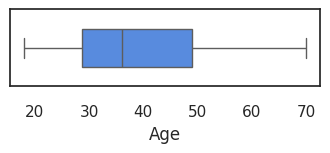

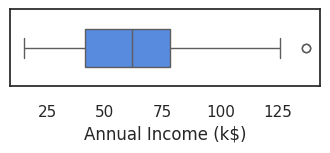

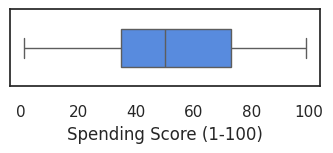

In [447]:
numeric_feature = df.select_dtypes(include = np.number)
column_to_plot = numeric_feature.columns

sns.set_theme(style = "white")

# Ploting boxplot for all numeric featires
for n in column_to_plot:
  plt.figure(figsize = (4,1))
  ax = sns.boxplot(x = df[n],
                   width = 0.5,
                   color = "#4285f4",
                   native_scale = True
                  )

  plt.show()

## Exploratory Data Analysis(EDA)

### Quick overview

In [448]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [449]:
df.describe(include = "category").transpose()

,count,unique,top,freq
Gender,200,2,Female,112


In [450]:
df.nunique()

,0
Gender,2
Age,51
Annual Income (k$),64
Spending Score (1-100),84


In [451]:
df["Gender"].value_counts()

,count
Gender,
Female,112
Male,88


### Visualisation

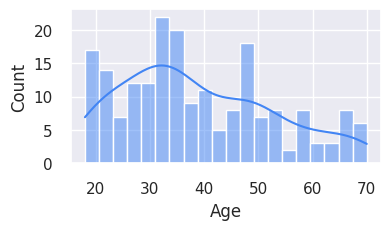

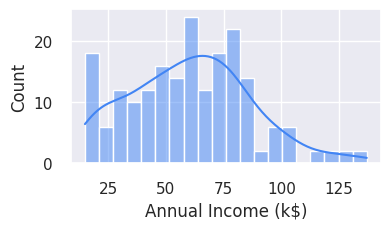

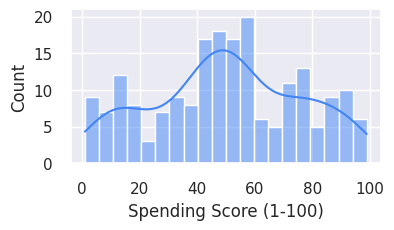

In [452]:
numeric_feature = df.select_dtypes(include = np.number)
column_to_plot = numeric_feature.columns

sns.set_theme(style = "white")

# Ploting boxplot for all numeric features
for n in column_to_plot:

  plt.figure(figsize = (4,2))
  sns.set_theme()

  ax = sns.histplot(data = df,
                    x = n,
                    kde = True,
                    color = "#4285f4",
                    bins = 20 # number of bins in graph
                   )


plt.show()

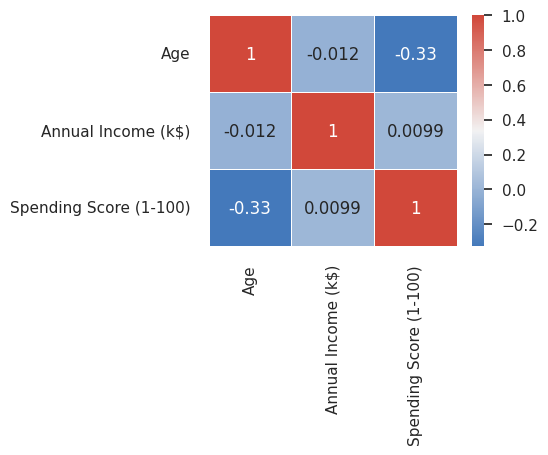

In [453]:
#data_to_plot_correlation = df[numeric_feature]
numeric_feature = df.select_dtypes(include = np.number)
correlation_matrix = numeric_feature.corr()

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, as_cmap=True)

plt.figure(figsize = (4,3))
plt.rcParams.update({'font.size': 12})
ax = sns.heatmap(correlation_matrix,
                 #mask = mask,
                 annot = True,
                 cmap = cmap,
                 linewidth = 0.5)
plt.show()

## Creating ML model

### Model selection

In [454]:
categorical_features = ["Gender"]

clustering = setup(df,
                   ignore_features = ["CustomerID"],

                   categorical_features = categorical_features,
                   max_encoding_ohe = 25,
                   encoding_method = "max_encoding_ohe",

                   normalize = True,
                   normalize_method = "zscore",

                   session_id = 0 # Set seed
                   )

,Description,Value
0,Session id,0
1,Original data shape,"(200, 4)"
2,Transformed data shape,"(200, 4)"
3,Ignore features,1
4,Numeric features,3
5,Categorical features,1
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [455]:
preprocess_data = get_config("train_transformed")
preprocess_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [456]:
# List of models for clustering
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [457]:
list_of_model = models().index.values

for n in list_of_model:
  print("Algorithm:", n)
  model = create_model(n)
  print("----------\n")

Algorithm: kmeans


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2990,69.1093,1.2821,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

----------

Algorithm: ap


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4036,91.1201,0.8553,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

----------

Algorithm: meanshift


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

----------

Algorithm: sc


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2710,55.0838,1.1092,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

----------

Algorithm: hclust


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2632,60.3062,1.4020,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

----------

Algorithm: dbscan


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0120,12.0994,1.3894,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

----------

Algorithm: optics


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0355,12.2760,1.4398,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

----------

Algorithm: birch


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2626,59.8642,1.2881,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

----------



### Affinity Propagation

In [458]:
ap_model = create_model("ap")
ap_model_cluster = assign_model(ap_model)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4036,91.1201,0.8553,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [459]:
# Number of clusters
ap_model_cluster["Cluster"].nunique()

16

In [460]:
# Number of observations in each cluster
ap_model_cluster["Cluster"].value_counts()

,count
Cluster,
Cluster 9,21
Cluster 13,21
Cluster 8,19
Cluster 15,14
Cluster 3,13
Cluster 0,13
Cluster 6,12
Cluster 4,12
Cluster 10,12


In [461]:
evaluate_model(ap_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### K-Means

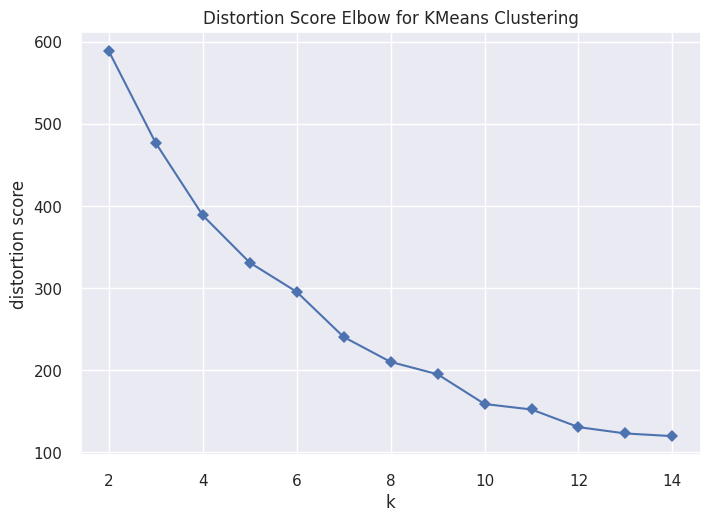

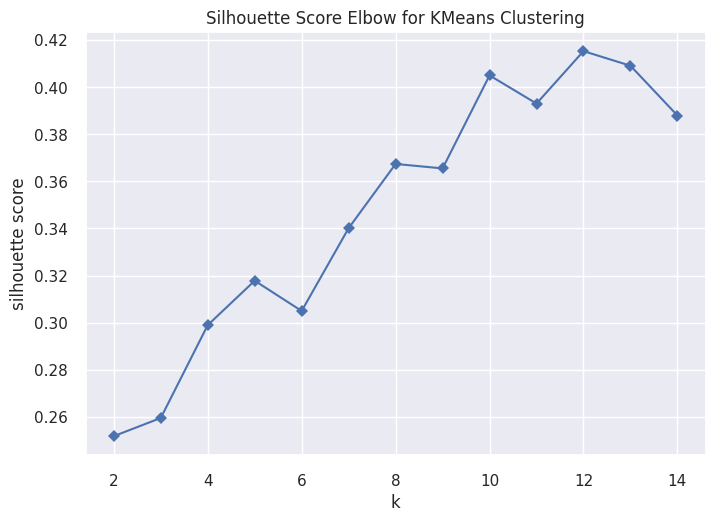

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [462]:
# Finding the number of cluster

# Plot distortion (mean sum of squared distances to centers)
# The lower, the better
elbow_visualizer = KElbowVisualizer(KMeans(random_state = 0),
                                    k = (2,15),
                                    metric = "distortion",
                                    timings = False,
                                    locate_elbow = False
                                    )
elbow_visualizer.fit(preprocess_data)
elbow_visualizer.show()

# Plot silhouette
# The higer, the better
elbow_visualizer = KElbowVisualizer(KMeans(random_state = 0),
                                    k = (2,15),
                                    metric = "silhouette",
                                    timings = False,
                                    locate_elbow = False
                                    )
elbow_visualizer.fit(preprocess_data)
elbow_visualizer.show()

In [463]:
kmeans_model = create_model("kmeans",
                            num_clusters = 12)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4153,87.4407,0.8366,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## Finalise model

In [464]:
# In this case, we select k-means
model = kmeans_model

df_cluster = assign_model(model)
df_cluster.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,Cluster 3
1,Male,21,15,81,Cluster 3
2,Female,20,16,6,Cluster 1
3,Female,23,16,77,Cluster 4
4,Female,31,17,40,Cluster 1


## Interpreatation of results

In [465]:
# Preprocess column Cluster

df_cluster["Cluster"] = df_cluster["Cluster"].str.replace("Cluster", "")
df_cluster["Cluster"] = df_cluster["Cluster"].astype(int)

# To make range from 0-11 to 1-12
df_cluster["Cluster"] = df_cluster["Cluster"] + 1

df_cluster.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,4
1,Male,21,15,81,4
2,Female,20,16,6,2
3,Female,23,16,77,5
4,Female,31,17,40,2


### Aggregate function of each cluster

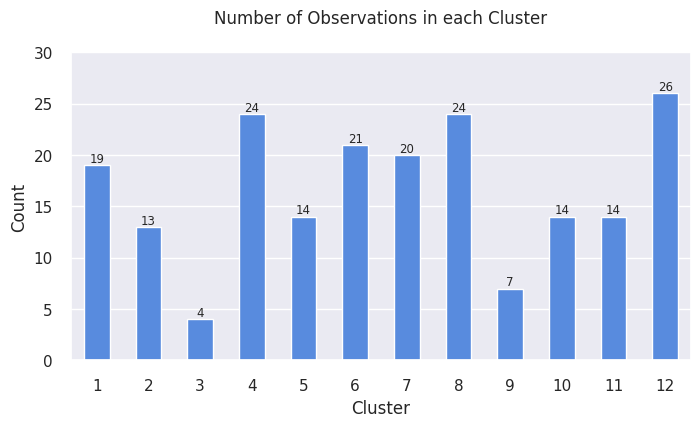

In [466]:
plt.figure(figsize = (8,4))
sns.set_theme()

ax = sns.countplot(data = df_cluster,
                   x = "Cluster",
                   hue = "Cluster",
                   palette= ["#4285f4"],
                   width = 0.5,
                   order = df_cluster["Cluster"].sort_values(),
                   legend = False
                  )

plt.title("Number of Observations in each Cluster\n",
          fontsize = 12)

ax.set(ylim = (0, 30))

# Showing value at the top of each bar
for container in ax.containers:
    ax.bar_label(container,
                 fontsize = 8.5,
                 #fontweight = "bold"
                 )

plt.xlabel("Cluster")
plt.ylabel("Count")

plt.show()

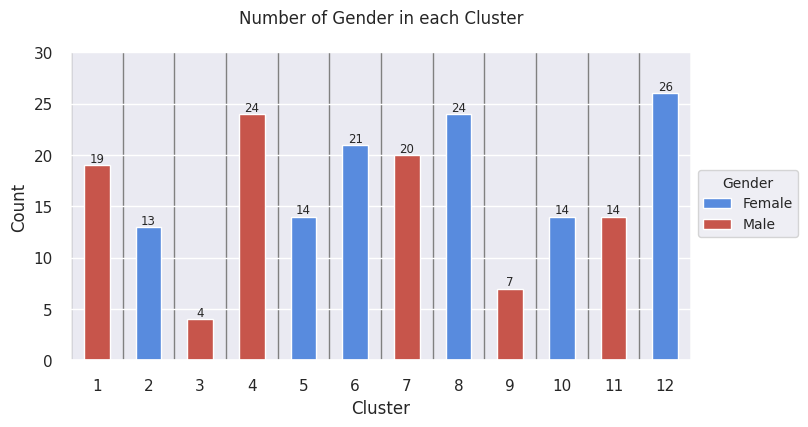

In [467]:
plt.figure(figsize = (8,4))

ax = sns.countplot(data = df_cluster,
                   x = "Cluster",
                   hue = "Gender",
                   palette= ["#4285f4", "#DB4437"],
                   width = 0.5
                  )

plt.title("Number of Gender in each Cluster\n",
          fontsize = 12)
plt.xlabel("Cluster")
plt.ylabel("Count")

plt.legend(title = "Gender",
           frameon = True,
           title_fontsize = 10,
           fontsize = 10,
           loc = "upper left",
           bbox_to_anchor = (1, 0.64)
          )

ax.set(ylim = (0, 30))

# Showing value at the top of each bar
for container in ax.containers:
    ax.bar_label(container,
                 fontsize = 8.5,
                 #fontweight = "bold"
                 )

# Drawing the vertical line to seperate each cluster
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.grid(True,
              which = "minor",
              color = "grey",
              lw = 1)

plt.show()

In [468]:
df_cluster.groupby(["Cluster","Gender"])["Gender"].count()

Cluster  Gender
1        Female     0
         Male      19
2        Female    13
         Male       0
3        Female     0
         Male       4
4        Female     0
         Male      24
5        Female    14
         Male       0
6        Female    21
         Male       0
7        Female     0
         Male      20
8        Female    24
         Male       0
9        Female     0
         Male       7
10       Female    14
         Male       0
11       Female     0
         Male      14
12       Female    26
         Male       0
Name: Gender, dtype: int64

In [469]:
group_by_cluster_gender = df_cluster.groupby(by = ["Cluster","Gender"])
group_by_cluster_gender.agg(["mean","min","max"])

Age             Annual Income (k$)               \
                     mean   min   max               mean   min    max   
Cluster Gender                                                          
1       Female        NaN   NaN   NaN                NaN   NaN    NaN   
        Male    59.315789  47.0  70.0          54.315789  43.0   63.0   
2       Female  41.538462  20.0  58.0          26.538462  16.0   39.0   
        Male          NaN   NaN   NaN                NaN   NaN    NaN   
3       Female        NaN   NaN   NaN                NaN   NaN    NaN   
        Male    30.000000  28.0  32.0         115.750000  99.0  137.0   
4       Female        NaN   NaN   NaN                NaN   NaN    NaN   
        Male    25.250000  18.0  40.0          41.250000  15.0   67.0   
5       Female  25.857143  20.0  35.0          26.642857  16.0   39.0   
        Male          NaN   NaN   NaN                NaN   NaN    NaN   
6       Female  32.190476  27.0  38.0          86.047619  70.0  120.0   
        Male          NaN   NaN   NaN                NaN   NaN    NaN   
7       Female        NaN   NaN   NaN                NaN   NaN    NaN   
        Male    39.500000  19.0  59.0          85.150000  71.0  137.0   
8       Female  27.833333  18.0  40.0          58.125000  40.0   76.0   
        Male          NaN   NaN   NaN                NaN   NaN    NaN   
9       Female        NaN   NaN   NaN                NaN   NaN    NaN   
        Male    54.428571  37.0  67.0          26.142857  19.0   39.0   
10      Female  43.785714  34.0  57.0          93.285714  73.0  126.0   
        Male          NaN   NaN   NaN                NaN   NaN    NaN   
11      Female        NaN   NaN   NaN                NaN   NaN    NaN   
        Male    34.214286  27.0  40.0          78.928571  69.0   93.0   
12      Female  54.153846  43.0  68.0          54.230769  38.0   79.0   
        Male          NaN   NaN   NaN                NaN   NaN    NaN   

               Spending Score (1-100)              
                                 mean   min   max  
Cluster Gender                                     
1       Female                    NaN   NaN   NaN  
        Male                49.210526  41.0  60.0  
2       Female              20.692308   5.0  40.0  
        Male                      NaN   NaN   NaN  
3       Female                    NaN   NaN   NaN  
        Male                80.500000  68.0  97.0  
4       Female                    NaN   NaN   NaN  
        Male                60.916667  35.0  92.0  
5       Female              79.142857  61.0  99.0  
        Male                      NaN   NaN   NaN  
6       Female              81.666667  69.0  95.0  
        Male                      NaN   NaN   NaN  
7       Female                    NaN   NaN   NaN  
        Male                14.050000   1.0  36.0  
8       Female              46.541667  29.0  60.0  
        Male                      NaN   NaN   NaN  
9       Female                    NaN   NaN   NaN  
        Male                14.714286   3.0  36.0  
10      Female              20.642857   5.0  39.0  
        Male                      NaN   NaN   NaN  
11      Female                    NaN   NaN   NaN  
        Male                83.285714  63.0  97.0  
12      Female              48.961538  35.0  59.0  
        Male                      NaN   NaN   NaN

In [470]:
group_by_cluster_gender = df_cluster.drop(columns = ["Gender"]).groupby(by = ["Cluster"])
group_by_cluster_gender.agg(["mean","min","max"])

Age         Annual Income (k$)          Spending Score (1-100)  \
              mean min max               mean min  max                   mean   
Cluster                                                                         
1        59.315789  47  70          54.315789  43   63              49.210526   
2        41.538462  20  58          26.538462  16   39              20.692308   
3        30.000000  28  32         115.750000  99  137              80.500000   
4        25.250000  18  40          41.250000  15   67              60.916667   
5        25.857143  20  35          26.642857  16   39              79.142857   
6        32.190476  27  38          86.047619  70  120              81.666667   
7        39.500000  19  59          85.150000  71  137              14.050000   
8        27.833333  18  40          58.125000  40   76              46.541667   
9        54.428571  37  67          26.142857  19   39              14.714286   
10       43.785714  34  57          93.285714  73  126              20.642857   
11       34.214286  27  40          78.928571  69   93              83.285714   
12       54.153846  43  68          54.230769  38   79              48.961538   

                 
        min max  
Cluster          
1        41  60  
2         5  40  
3        68  97  
4        35  92  
5        61  99  
6        69  95  
7         1  36  
8        29  60  
9         3  36  
10        5  39  
11       63  97  
12       35  59

In [471]:
numeric_feature_group = df_cluster.drop(columns = ["Gender"]).groupby(by = "Cluster")
numeric_feature_group.agg(["mean","min","max"])

Age         Annual Income (k$)          Spending Score (1-100)  \
              mean min max               mean min  max                   mean   
Cluster                                                                         
1        59.315789  47  70          54.315789  43   63              49.210526   
2        41.538462  20  58          26.538462  16   39              20.692308   
3        30.000000  28  32         115.750000  99  137              80.500000   
4        25.250000  18  40          41.250000  15   67              60.916667   
5        25.857143  20  35          26.642857  16   39              79.142857   
6        32.190476  27  38          86.047619  70  120              81.666667   
7        39.500000  19  59          85.150000  71  137              14.050000   
8        27.833333  18  40          58.125000  40   76              46.541667   
9        54.428571  37  67          26.142857  19   39              14.714286   
10       43.785714  34  57          93.285714  73  126              20.642857   
11       34.214286  27  40          78.928571  69   93              83.285714   
12       54.153846  43  68          54.230769  38   79              48.961538   

                 
        min max  
Cluster          
1        41  60  
2         5  40  
3        68  97  
4        35  92  
5        61  99  
6        69  95  
7         1  36  
8        29  60  
9         3  36  
10        5  39  
11       63  97  
12       35  59

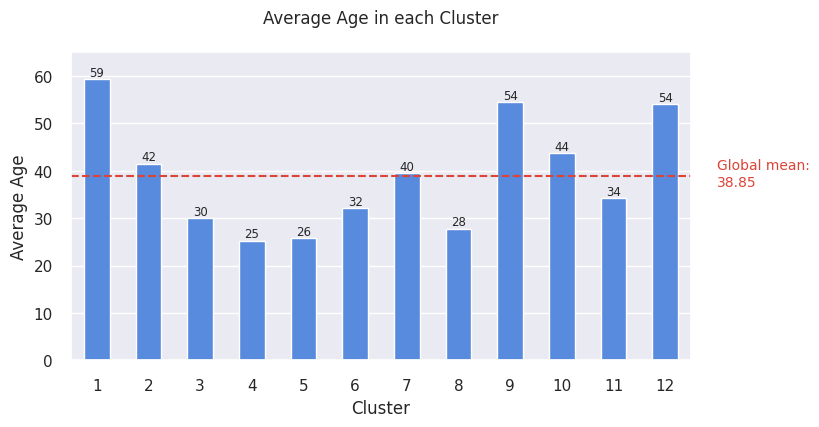

In [472]:
plt.figure(figsize = (8,4))

ax = sns.barplot(data = df_cluster,
                 x = "Cluster",
                 y = "Age",
                 color = "#4285f4",
                 width = 0.5,
                 errorbar = None)

plt.title("Average Age in each Cluster\n",
          fontsize = 12)
plt.xlabel("Cluster")
plt.ylabel("Average Age")

ax.set(ylim = (0, 65))

# Draw an average line of the entire dataset
dataset_mean = df_cluster["Age"].mean()

ax.axhline(dataset_mean,
           ls = "--",
           color = "#DB4437")

ax.text(12,
        dataset_mean - 2,
        "Global mean:\n" + str(dataset_mean),
        fontsize = 10,
        color = "#DB4437"
        )


# Showing value at the top of each bar
for container in ax.containers:
    ax.bar_label(container,
                 fontsize = 8.5,
                 fmt = "{:,.0f}", # 1 digit "{:,.1f}"
                 #padding = 3
                 #fontweight = "bold"
                 )

plt.show()

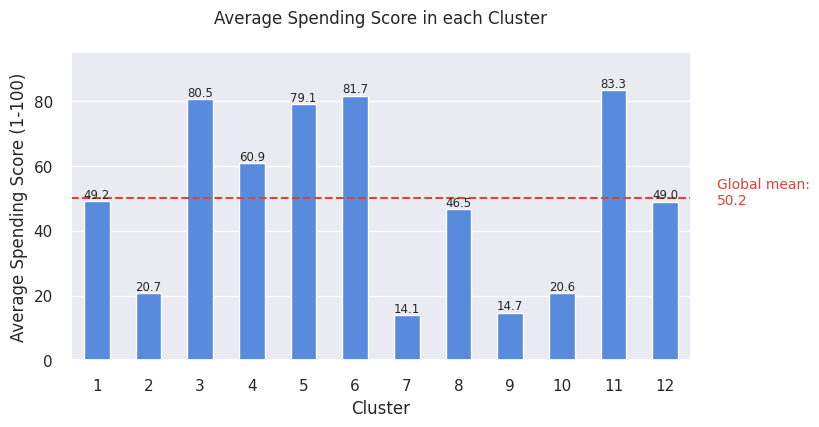

In [473]:
plt.figure(figsize = (8,4))

ax = sns.barplot(data = df_cluster,
                 x = "Cluster",
                 y = "Spending Score (1-100)",
                 color = "#4285f4",
                 width = 0.5,
                 errorbar = None)

plt.title("Average Spending Score in each Cluster\n",
          fontsize = 12)
plt.xlabel("Cluster")
plt.ylabel("Average Spending Score (1-100)")

ax.set(ylim = (0, 95))

# Draw an average line of the entire dataset
dataset_mean = df_cluster["Spending Score (1-100)"].mean()

ax.axhline(dataset_mean,
           ls = "--",
           color = "#DB4437")

ax.text(12,
        dataset_mean - 2,
        "Global mean:\n" + str(dataset_mean),
        fontsize = 10,
        color = "#DB4437"
        )

# Showing value at the top of each bar
for container in ax.containers:
    ax.bar_label(container,
                 fontsize = 8.5,
                 fmt = "{:,.1f}",
                 #padding = 3
                 #fontweight = "bold"
                 )

plt.show()

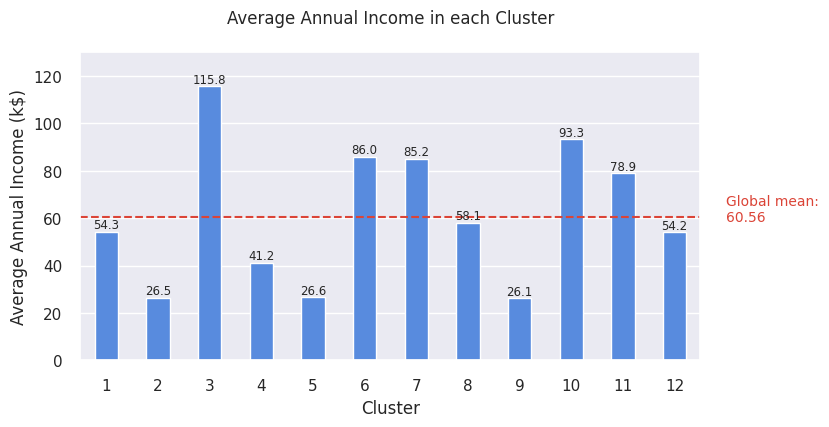

In [474]:
plt.figure(figsize = (8,4))

ax = sns.barplot(data = df_cluster,
                 x = "Cluster",
                 y = "Annual Income (k$)",
                 color = "#4285f4",
                 width = 0.45,
                 errorbar = None)

plt.title("Average Annual Income in each Cluster\n",
          fontsize = 12)
plt.xlabel("Cluster")
plt.ylabel("Average Annual Income (k$)")

ax.set(ylim = (0, 130))

# Draw an average line of the entire dataset
dataset_mean = df_cluster["Annual Income (k$)"].mean()

ax.axhline(dataset_mean,
           ls = "--",
           color = "#DB4437")

ax.text(12,
        dataset_mean - 2,
        "Global mean:\n" + str(dataset_mean),
        fontsize = 10,
        color = "#DB4437"
        )

# Showing value at the top of each bar
for container in ax.containers:
    ax.bar_label(container,
                 fontsize = 8.5,
                 fmt = "{:,.1f}",
                 #padding = 3
                 #fontweight = "bold"
                 )

plt.show()

### PCA for visulisation

In [475]:
# Convert categorical value to numeric value which represents class
label_encoder = LabelEncoder()
df_cluster["Gender"] = label_encoder.fit_transform(df["Gender"])

# Applying PCA
pca = PCA(n_components = 2)
df_cluster_pca = pca.fit_transform(df_cluster)

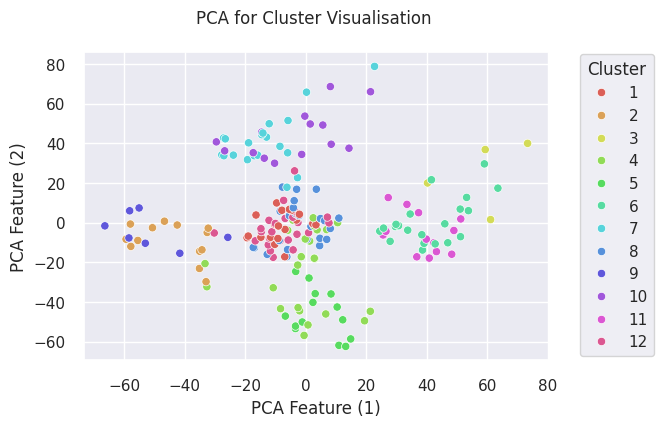

In [476]:
plt.figure(figsize = (6,4))
sns.set_theme()

ax = sns.scatterplot(data = df_cluster,
                     x = df_cluster_pca[:,0],
                     y = df_cluster_pca[:,1],
                     hue = "Cluster",
                     palette = sns.color_palette("hls", 12)
                     )

plt.legend(title = "Cluster",
           frameon = True,
           bbox_to_anchor = (1.05, 1.02)
           )

plt.title("PCA for Cluster Visualisation \n",
          fontsize = 12)
plt.xlabel("PCA Feature (1)")
plt.ylabel("PCA Feature (2)")

plt.show()

## Identifying cluster to an unseen data

In [477]:
# prediction = predict_model(model,
#                            data = other_df)
# prediction.head()